# CÓDIGO

## Método de la Bisección

In [263]:
def biseccion(f: float, a: float, b: float, TOL: float, N: int) -> float:
    i = 1
    FA = f(a)

    while i <= N:
        p = a + (b - a) / 2
        FP = f(p)

        if FP == 0 or (b - a) / 2 < TOL:
            return p

        i += 1

        if FA * FP > 0:
            a = p
            FA = FP
        else:
            b = p

    print(f'El método fracasó después de {N} iteraciones.')
    return None

# CONJUNTO DE EJERCICIOS

## Ejercicio 1

**Use el método de bisección para encontrar soluciones precisas dentro de $10^{-2}$ para $x^3 - 7x^2 + 14x - 6 = 0$ en cada intervalo.**

Se define la función de la ecuación y párametros dados.

In [268]:
def funcion1(x):
    return x**3 - 7 * x**2 + 14*x - 6

TOL = 10**-2
N0 = 100

**a. [0, 1]**

In [270]:
a = 0
b = 1

solucion1 = biseccion(funcion1, a, b, TOL, N0)
if solucion1 is not None:
    print(f'Solución aproximada encontrada: {solucion:.4f} en el intervalo [{a},{b}].')

Solución aproximada encontrada: 0.5858 en el intervalo [0,1].


**b. [1, 3.2]**

In [272]:
a = 1
b = 3.2

solucion2 = biseccion(funcion1, a, b, TOL, N0)
if solucion2 is not None:
    print(f'Solución aproximada encontrada: {solucion2:.4f} en el intervalo [{a},{b}].')

Solución aproximada encontrada: 3.0023 en el intervalo [1,3.2].


**c. [3.2, 4]**

In [274]:
a = 3.2
b = 4

solucion3 = biseccion(funcion1, a, b, TOL, N0)
if solucion3 is not None:
    print(f'Solución aproximada encontrada: {solucion3:.4f} en el intervalo [{a},{b}].')

Solución aproximada encontrada: 3.4188 en el intervalo [3.2,4].


## Ejercicio 4

**a. Dibuje las gráficas para $y = x^{2} - 1$ y $y = e^{1-x^{2}}$**

Las gráficas de las funciones se implementan gracias al siguiente código:

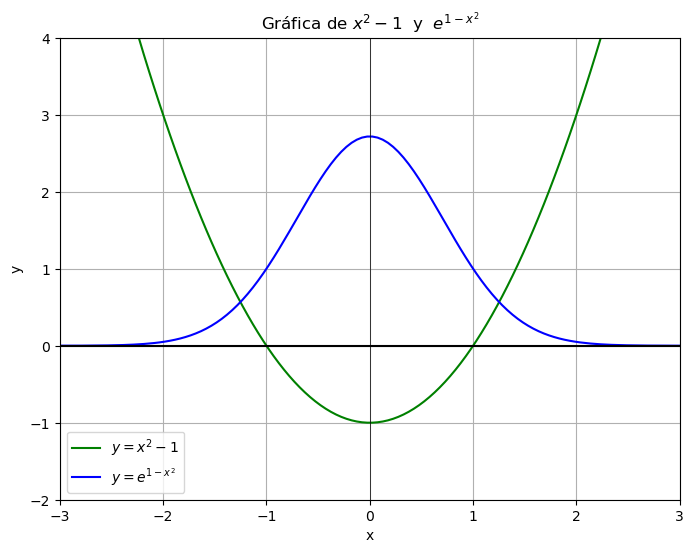

In [278]:
import numpy as np
import matplotlib.pyplot as plt

def equation1(x: float) -> float:
    return x**2 - 1

def equation2(x: float) -> float:
    return np.exp(1 - x**2)

x = np.linspace(-5, 5, 200)
y1 = equation1(x)
y2 = equation2(x)
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label=r'$y = x^{2} - 1$', color='green')
plt.plot(x, y2, label=r'$y = e^{1-x^{2}}$', color='blue')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfica de $x^{2}-1$  y  $e^{1-x^{2}}$')
plt.axhline(y=0, color='black')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
ax = plt.gca()
ax.set_ylim([-2, 4])
ax.set_xlim([-3, 3])

plt.grid(True)
plt.legend()
plt.show()

**b. Use el método de bisección para encontrar una aproximación dentro de $10^{-3}$ para un valor de $[-2,0]$ con $x^{2} - 1 = e^{1-x^{2}}$**

La función de la ecuación es:

In [281]:
def funcion4b(x):
    return ((x**2) - 1)-(np.exp(1-x**2))

De esta manera se visualiza la igualdad entre ambas ecuaciones:

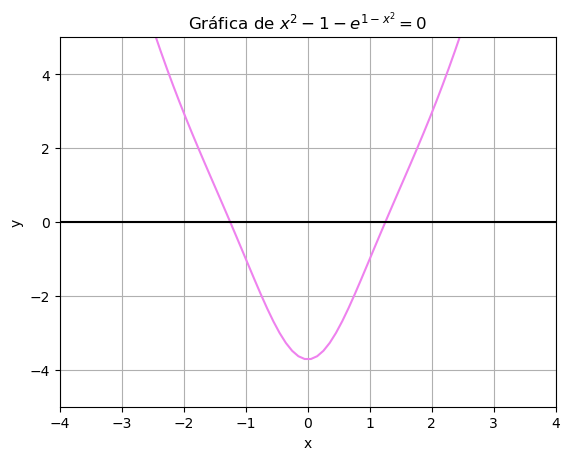

In [283]:
x = np.linspace(-5, 5, 100)

y = funcion4b(x)

plt.plot(x, y, label = '$x^{2} - 1 = e^{1-x^{2}}$', color = 'violet')

plt.axhline(y=0, color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfica de $x^{2} - 1 - e^{1-x^{2}} = 0$')
ax = plt.gca()
ax.set_ylim([-5, 5])
ax.set_xlim([-4, 4])
plt.grid(True)
plt.show()

Se aplica el método de la bisección con los parámetros dados:

In [285]:
a = -2
b = 0
TOL = 10**-3
N0 = 100

solucion4b = biseccion(funcion4b, a, b, TOL, N0)
if solucion4b is not None:
    print(f'Solución aproximada encontrada: {solucion4b:.4f} en el intervalo [{a},{b}].')

Solución aproximada encontrada: -1.2510 en el intervalo [-2,0].


# EJERCICIOS APLICADOS

## Ejercicio 1

**Un abrevadero de longitud 𝐿 tiene una sección transversal en forma de semicírculo con radio 𝑟. (Consulte la figura adjunta.) Cuando se llena con agua hasta una distancia ℎ a partir de la parte superior, el volumen 𝑉 de agua es:**

$V = L \left( 0.5 \pi r^2 - r^2 \arcsin\left(\frac{h}{r}\right) - h \sqrt{r^2 - h^2} \right)$

**Suponga que 𝐿 = 10 𝑐𝑚, 𝑟 = 1 𝑐𝑚 y 𝑉 =12.4 𝑐𝑚. Encuentre la profundidad del agua en el abrevadero dentro de 0.01 _cm_**

Del ejercicio se tiene que:
* Tolerancia: $0.01 cm$
* Intervalo: $[h_{min}, h_{max}]$, es decir: $[0,1]$ 

Se define de la función f(h) basada en el volumen V y el volumen objetivo:

In [291]:
def f(h, L=10, r=1, V=12.4):
    return L * (0.5 * np.pi * r**2 - r**2 * np.arcsin(h / r) - h * np.sqrt(r**2 - h**2)) - V

Se aplica el método de la bisección y se obtiene la profundidad:

In [293]:
a = 0
b = 1
TOL = 0.01
N0 = 100

profundidad = biseccion(f, a, b, TOL, N0)
if profundidad is not None:
    print(f'La profundidad del agua es aproximadamente: {profundidad:.4f} cm')

La profundidad del agua es aproximadamente: 0.1641 cm


## Ejercicio 2

**Un objeto que cae verticalmente a través del aire está sujeto a  una resistencia viscosa, así como a la fuerza de gravedad. Suponga que un objeto con masa 𝑚 cae desde una altura 𝑠 y que la altura del objeto después de 𝑡segundos es**

$s(t) = s_0 - \frac{mg}{k} t + \frac{m^2 g}{k^2} \left( 1 - e^{-\frac{kt}{m}} \right),$

**donde $( g = 9.81, \text{m/s}^2 )$ y $(k)$ representa el coeficiente de la resistencia del aire en $( \text{Ns/m})$. Suponga $( s_0 = 300, \text{m})$, $( m = 0.25 \, \text{kg})$ y $(k = 0.1, \text{Ns/m})$. Encuentre, dentro de $(0.01 \, \text{segundos})$, el tiempo que tarda un cuarto de kg en golpear el piso.**

Se define la función de posición s(t):

In [297]:
def s(t, s0=300, m=0.25, g=9.81, k=0.1):
    return s0 - (m * g / k) * t + (m**2 * g / k**2) * (1 - np.exp(-k * t / m))

Para determinar el tiempo:

In [298]:
a = 0
b = 100 
TOL = 0.01
N0 = 1000

tiempo = biseccion(lambda t: s(t), a, b, TOL, N0)
if tiempo is not None:
    print(f'El objeto golpea el piso aproximadamente en: {tiempo:.4f} segundos')

El objeto golpea el piso aproximadamente en: 14.7278 segundos


# EJERCICIOS TEÓRICOS

## Ejercicio 1

**Use el *teorema 2.1.* para encontrar una cota para el número de iteraciones necesarias para lograr una aproximación con precisión de $10^{-4}$ para la solución de $x^{3}-x-1=0$ que se encuentra dentro del intervalo $[1,2]$. Encuentre una aproximación para la raíz con este grado de precisión.**

Se define la ecuación del ejercicio:

In [303]:
def f(x):
    return x**3 - x - 1

Se calcula el número mínimo de iteraciones necesarias:

In [305]:
tolerancia = 1e-4
a = 1
b = 2
n_iteraciones = np.ceil(np.log((b - a) / tolerancia) / np.log(2))
print(f"Número mínimo de iteraciones necesarias: {int(n_iteraciones)}")

Número mínimo de iteraciones necesarias: 14


La raiz aproximada se obtiene a partir del método de la bisección.

In [307]:
raiz = biseccion(f, a, b, tolerancia, int(n_iteraciones))
print(f"La aproximación de la raíz es: {raiz:.4f}")

La aproximación de la raíz es: 1.3248


**GitHub:** [Métodos Númericos - @mateobtw18](https://github.com/mateobtw18/Metodos_Numericos)